<a href="https://colab.research.google.com/github/Anku192/AIML-class/blob/main/ML_Lab_Experiment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab Experiment 07
**Objective:** Implement Cross-Fold Validation to Assess the Performance of Classification Models.

#### 🧑‍🎓 Student Details

| Field                | Information                |
|---------------------|----------------------------|
| 👨‍🎓 **Name**            | _[Ankur P B]_     |
| 🆔 **USN**              | _[1RUA24CSE0059]_           |
| **Section**        | _[A]_ |
| **Programme**   | B.Tech(H)             |
| **School**  | Computer Science and Engineering |


In [1]:
import platform
import psutil
from datetime import datetime
import sys
import getpass
import os

# Timestamp
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
# System Information
system_info = {
    "User Name": getpass.getuser(),
    "Timestamp": timestamp,
    "OS": platform.system() + " " + platform.release(),
    "Processor": platform.processor(),
    "RAM (GB)": round(psutil.virtual_memory().total / (1024 ** 3), 2),
    "Python Version": platform.python_version(),
    "Working Directory": os.getcwd()
}
# Print formatted results
print("🧑‍💻 System Details\n" + "-"*40)
for key, value in system_info.items():
    print(f"{key:20}: {value}")


🧑‍💻 System Details
----------------------------------------
User Name           : root
Timestamp           : 2025-10-23 04:47:53
OS                  : Linux 6.6.105+
Processor           : x86_64
RAM (GB)            : 12.67
Python Version      : 3.12.12
Working Directory   : /content


### Student Tasks
<hr>

##### Learning Objectives
1.	Understand the fundamentals of cross-validation techniques and their importance in model evaluation.
2.	Implement k-fold cross-validation using scikit-learn.
3.	Compare multiple classification algorithms (Random Forest) using cross-validation.
4. Interpret cross-validation results.

**Step 01:**
- Import pandas, numpy, scikit-learn, matplotlib, seaborn and other required libraries for Classification task.

In [2]:
# [ Edit this cell ] Write your code below this line and execute the cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from tabulate import tabulate

plt.style.use('seaborn-v0_8-whitegrid')

**Step 02:**
- Load the provided dataset (CSV format is recommended) using pandas and perform initial data exploration.

In [3]:
# [ Edit this cell ] Write your code below this line and execute the cell
df = pd.read_csv('wine.csv')
display(df.head())

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Step 03:**
- Perform Exploratory Data Analysis

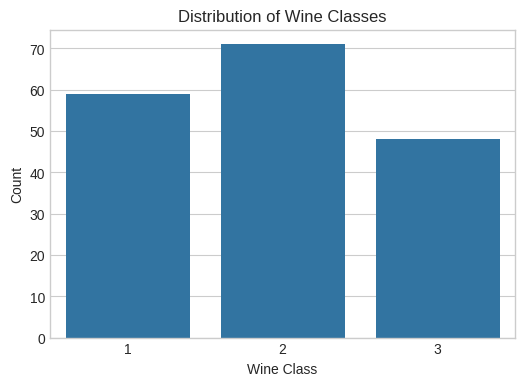


Descriptive Statistics:


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


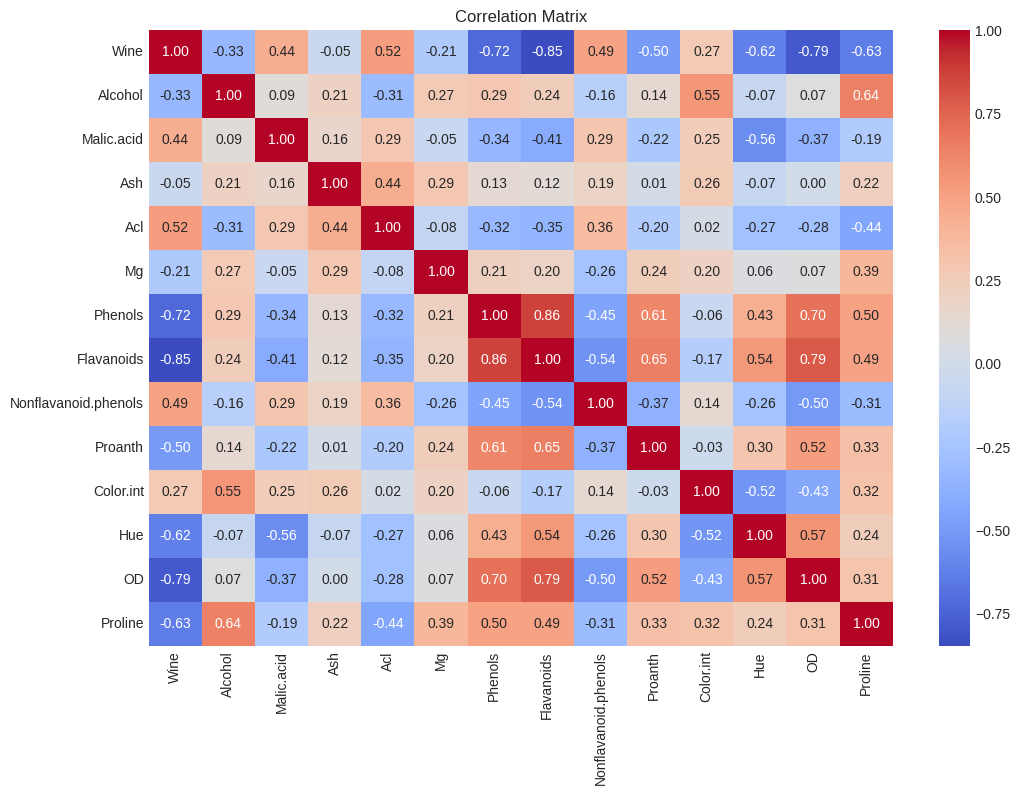

In [4]:
# [ Edit this cell ] Write your code below this line and execute the cell

# Display the distribution of the target variable ('Wine')
plt.figure(figsize=(6, 4))
sns.countplot(x='Wine', data=df)
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()

# Display descriptive statistics of the dataset
print("\nDescriptive Statistics:")
display(df.describe())

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Step 04:**
- Data visualization and class balance analysis: Create visualizations to understand class distribution and feature relationships.

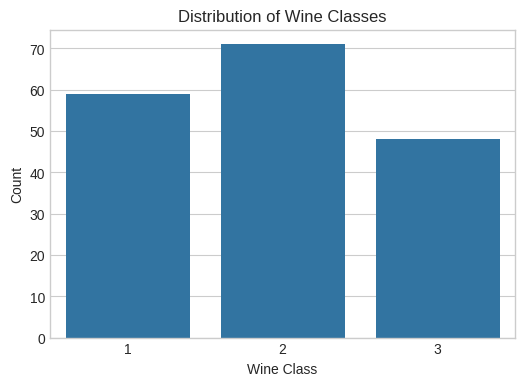


Descriptive Statistics:


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


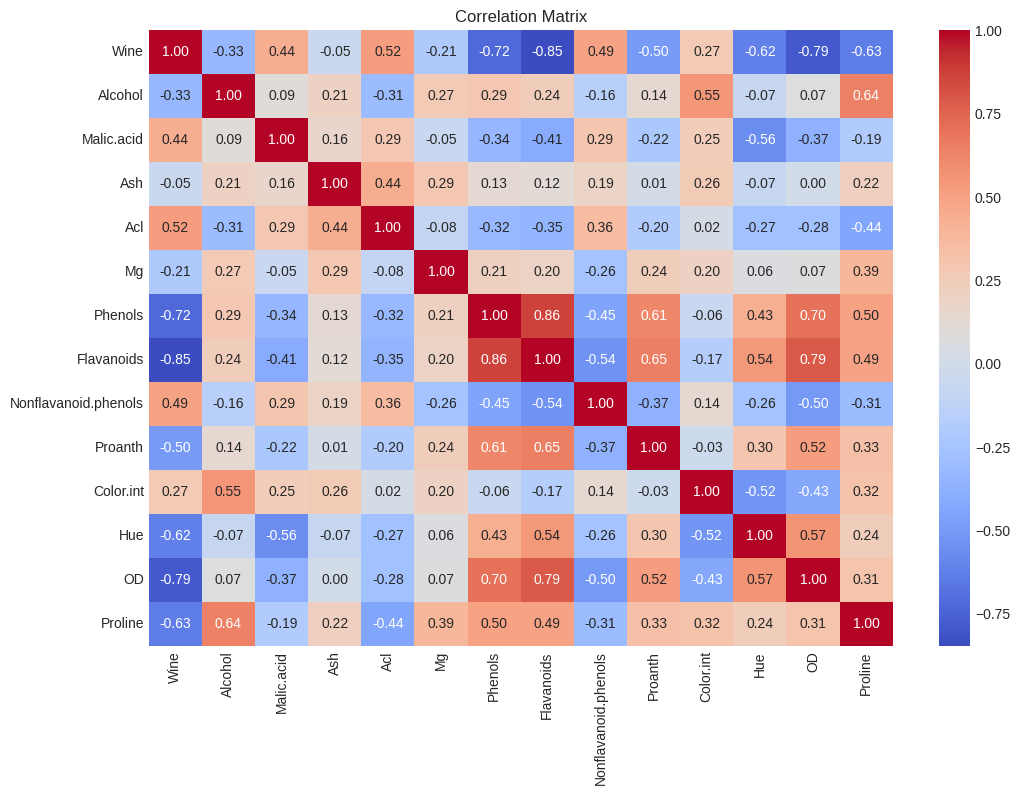

In [5]:
# [ Edit this cell ] Write your code below this line and execute the cell
plt.figure(figsize=(6, 4))
sns.countplot(x='Wine', data=df)
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()

# Display descriptive statistics of the dataset
print("\nDescriptive Statistics:")
display(df.describe())

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Step 05:**
-  Data preprocessing and preparation - Handle missing values, scale features, and prepare data for multiple classification algorithms.

In [7]:
# [ Edit this cell ] Write your code below this line and execute the cell
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('Wine', axis=1)
y = df['Wine']

# Check for missing values
print("Missing values before handling:")
print(X.isnull().sum())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n--- Scaled Features (First 5 rows) ---")
print(X_scaled[:5])

# Features for model training (using original column names for clarity)
feature_names = X.columns.tolist()
target_names = sorted(y.unique()) # Get unique class labels
print(f"\nFeature names: {feature_names}")
print(f"Target names: {target_names}")

Missing values before handling:
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

--- Scaled Features (First 5 rows) ---
[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -

**Step 06:**
- Implement k-fold cross-validation (k=5, k=10) - Apply standard k-fold cross-validation on multiple classifiers and analyze score distributions.

In [18]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(random_state=42)

classifiers = {
    "Random Forest": rf_clf,

}

k_folds = [5, 10]

for name, clf in classifiers.items():
    print(f"--- {name} ---")
    for k in k_folds:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        scores = cross_val_score(clf, X_scaled, y, cv=kf, scoring='accuracy')

        print(f"  {k}-Fold Cross-Validation:")
        print(f"    Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print("-" * (len(name) + 6))

--- Random Forest ---
  5-Fold Cross-Validation:
    Accuracy: 0.9832 (+/- 0.0223)
  10-Fold Cross-Validation:
    Accuracy: 0.9833 (+/- 0.0356)
-------------------


### ✅ Rubric: Cross Fold Validation (10 Marks)
<hr>

**For Course Instructor Use**

A rubric for accessing experiment focused on K-NN classification modeling and analysis.

| **Criteria**                     | **Description**                                                                                         | **Max Marks** | **Marks Obtained** |
|----------------------------------|---------------------------------------------------------------------------------------------------------|---------------|---------------------|
| **Data Loading & Exploration**  | Proper dataset loading, initial exploration.                   |      3        |                     |
| **Model Implementation and Model Evaluation**         | Correct implementation of k-fold using scikit-learn with appropriate parameters and multiple algorithms.       |      3        |                     |
| **Analysis**     |  Accurate calculation of cross-validation score. |      2        |                     |
| **Documentation & Viva Insight** | Brief comments, explanations, and ability to answer questions during viva on technique choices.         |      2        |                     |

**Marks Obtained: ______ / 10**

<hr>

**Course Instructor Signature:** ____________________      

##### Link for pandoc - Download the Software for export PDF for submission in GCR
https://github.com/jgm/pandoc/releases/tag/3.7.0.2

# Task
Perform k-fold cross-validation with k=5 and k=10 on the preprocessed data using multiple classification algorithms.

## Import necessary libraries

### Subtask:
Import `KFold` and `cross_val_score` from `sklearn.model_selection`, and any classification models you want to evaluate (e.g., `RandomForestClassifier`).


**Reasoning**:
Import necessary modules for cross-validation and model evaluation.



In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

## Define classifiers

### Subtask:
Define classifiers to be used for cross-validation.


**Reasoning**:
Define a dictionary of classifiers to be used for cross-validation, including RandomForestClassifier.

